In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\user\\Desktop\\data sets\\weight-height.csv")

In [3]:
print(df.shape)
df.head()

(10000, 3)


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<Axes: xlabel='Height', ylabel='Weight'>

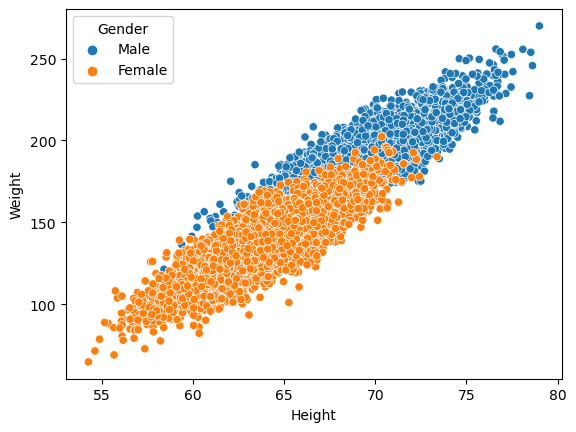

In [5]:
sns.scatterplot(x=df['Height'],y=df['Weight'],hue=df['Gender'])

In [6]:
from sklearn.preprocessing import LabelEncoder
lb= LabelEncoder()
df['Gender']= lb.fit_transform(df['Gender'])

In [7]:
x =df.iloc[:,1:]
y= df['Gender']

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=43)

In [9]:
from sklearn.linear_model import Perceptron
p = Perceptron()

In [10]:
p.fit(x_train,y_train)

Perceptron()

In [11]:
p.coef_

array([[-4468.30632224,  1805.35562134]])

In [12]:
p.intercept_

array([-94.])

In [13]:
from mlxtend.plotting import plot_decision_regions

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

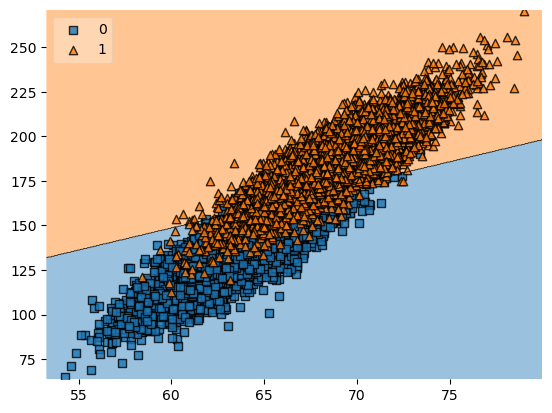

In [14]:
plot_decision_regions(x.values, y.values, clf=p, legend=2)

In [15]:
from sklearn.metrics import r2_score

In [16]:
y_pred= p.predict(x_test)
r2_score(y_test,y_pred)

0.6478295495019589

# Perceptron 2nd class
Perceptron trick

In [17]:
from sklearn.datasets import make_classification
import numpy as np
x,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

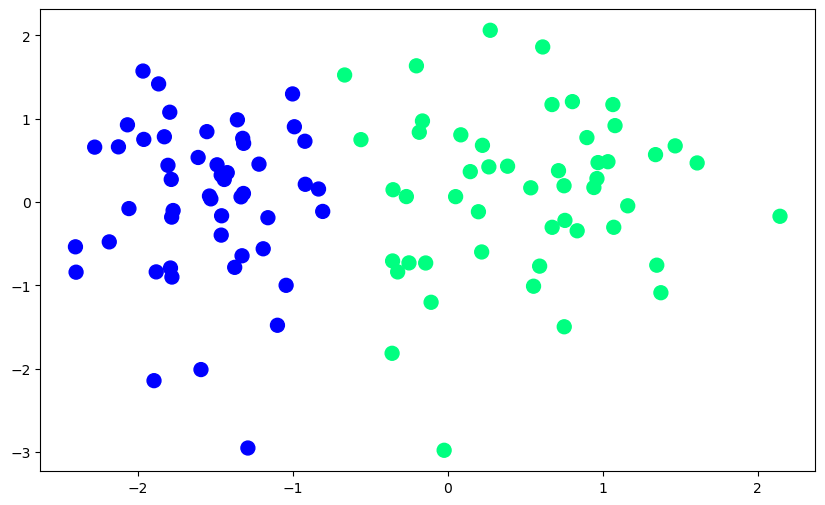

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)

In [19]:
def step(z):
    return 1 if z>0 else 0

In [20]:
def perceptron(x,y):
    x= np.insert(x,0,1,axis=1)
    weights = np.ones(x.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(x[j],weights))
        weights = weights + lr* (y[j]-y_hat)*x[j]
    
    return weights[0],weights[1:]

In [21]:
intercept_,coef_ = perceptron(x,y)

In [22]:
print(coef_)
print(intercept_)

[1.34582741 0.07478133]
0.9


In [23]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [24]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input +b

(-3.0, 2.0)

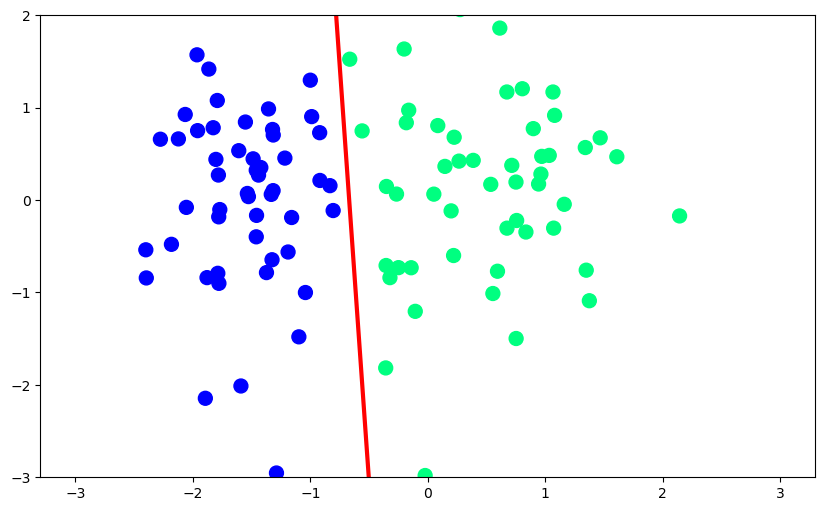

In [25]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

(-3.0, 2.0)

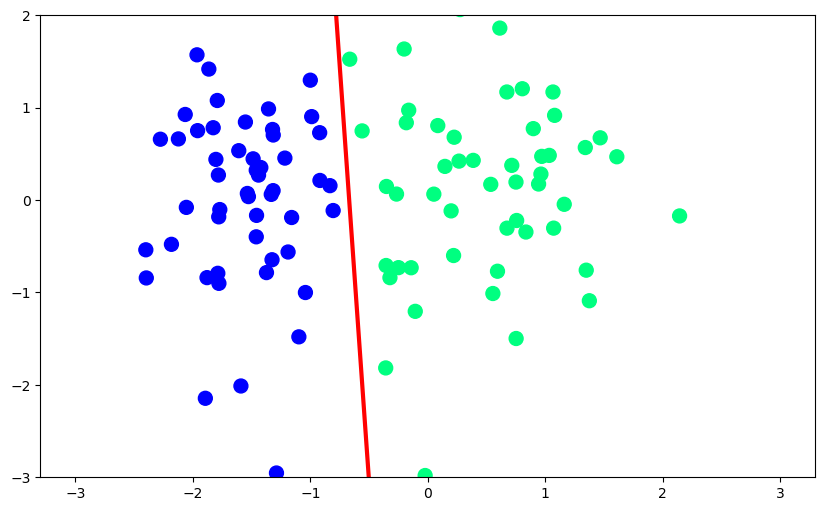

In [26]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# Perceptron loss function
2nd vedio perceptron

In [27]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=15)

In [28]:
X.shape

(100, 2)

In [29]:
y.shape

(100,)

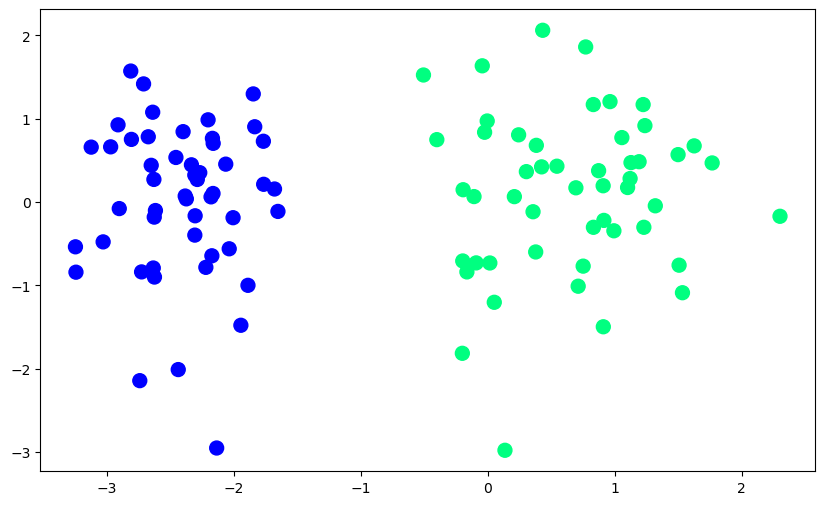

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [31]:
def percepton(X,y):
    w1=w2=b=1
    lr = 0.1
    
    for j in range(1000):
        
        for i in range(X.shape[0]):
        
            #check condition
            z= w1*X[i][0] + w2*X[i][1]  +b

            if z*y[i] <0:
                w1 = w1 + lr*y[i]*X[i][0]
                w2 = w2 + lr*y[i]*X[i][1]
                b = +lr*y[i]
            
    return w1,w2,b

In [32]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [33]:
w1,w2,b = percepton(X,y)

In [34]:
w1

0.1946068689281032

In [35]:
m = -(w1/w2)
c = -(b/w2)

print(m,c)

-14.512218978117088 -7.4571977125219435


(-3.0, 2.0)

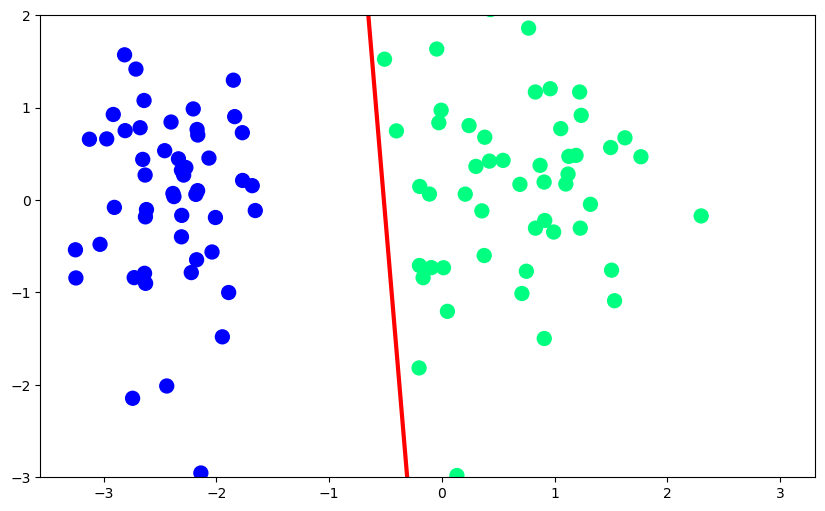

In [36]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + c

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

or_data = pd.DataFrame()
and_data = pd.DataFrame()
xor_data = pd.DataFrame()

or_data['input1']=[1,1,0,0]
or_data['input2']=[1,0,1,0]
or_data['ouput']=[1,1,1,0]

and_data['input1']=[1,1,0,0]
and_data['input2']=[1,0,1,0]
and_data['ouput']=[1,0,0,0]

xor_data['input1']=[1,1,0,0]
xor_data['input2']=[1,0,1,0]
xor_data['ouput']=[0,1,1,0]

In [44]:
and_data

,input1,input2,ouput
0,1,1,1
1,1,0,0
2,0,1,0
3,0,0,0


<Axes: xlabel='input1', ylabel='input2'>

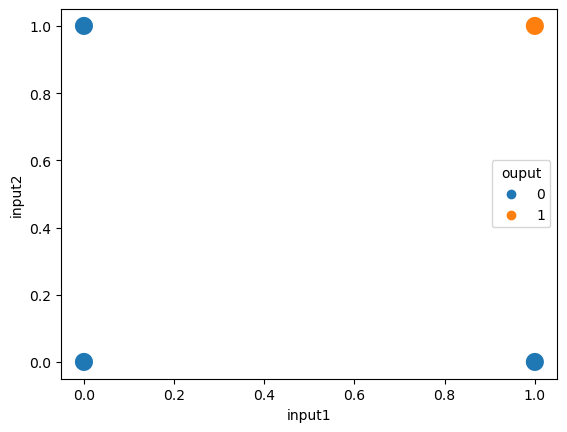

In [52]:
sns.scatterplot(x=and_data['input1'],y=and_data['input2'],hue=and_data['ouput'],s=200)

In [53]:
or_data

,input1,input2,ouput
0,1,1,1
1,1,0,1
2,0,1,1
3,0,0,0


<Axes: xlabel='input1', ylabel='input2'>

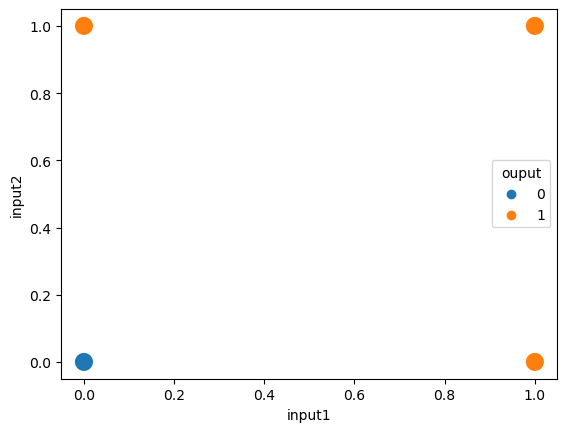

In [56]:
sns.scatterplot(x=or_data['input1'],y=or_data['input2'],hue=or_data['ouput'],s=200)

In [57]:
xor_data

,input1,input2,ouput
0,1,1,0
1,1,0,1
2,0,1,1
3,0,0,0


<Axes: xlabel='input1', ylabel='input2'>

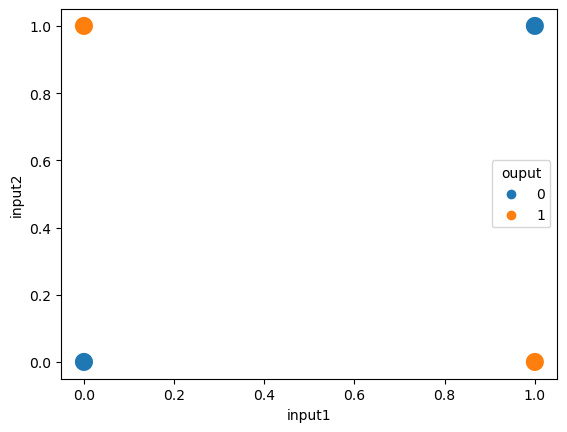

In [59]:
sns.scatterplot(x=xor_data['input1'],y=xor_data['input2'],hue=xor_data['ouput'],s=200)

In [60]:
from sklearn.linear_model import Perceptron
clf1=Perceptron()
clf2=Perceptron()
clf3=Perceptron()

In [61]:
clf1.fit(and_data.iloc[:,0:2].values,and_data.iloc[:,-1].values)
clf2.fit(or_data.iloc[:,0:2].values,or_data.iloc[:,-1].values)
clf3.fit(xor_data.iloc[:,0:2].values,xor_data.iloc[:,-1].values)

Perceptron()

In [62]:
clf1.coef_

array([[2., 2.]])

In [63]:
clf1.intercept_

array([-2.])

In [64]:
x=np.linspace(-1,1,5)

In [65]:
y=-x+1

<Axes: xlabel='input1', ylabel='input2'>

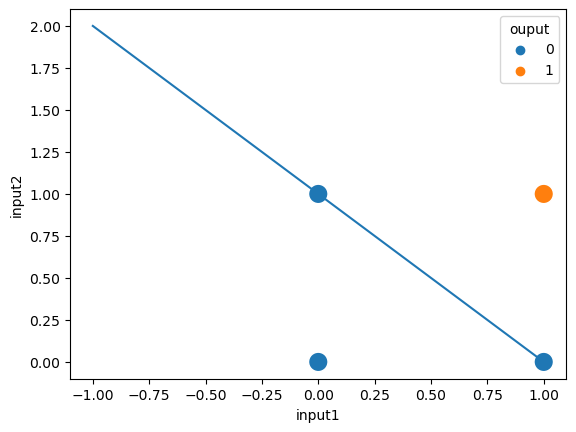

In [67]:
plt.plot(x,y)
sns.scatterplot(x=and_data['input1'],y=and_data['input2'],hue=and_data['ouput'],s=200)

In [68]:
print(clf2.coef_)
print(clf2.intercept_)
x1=np.linspace(-1,1,5)
y1=-x+0.5

[[2. 2.]]
[-1.]


<Axes: xlabel='input1', ylabel='input2'>

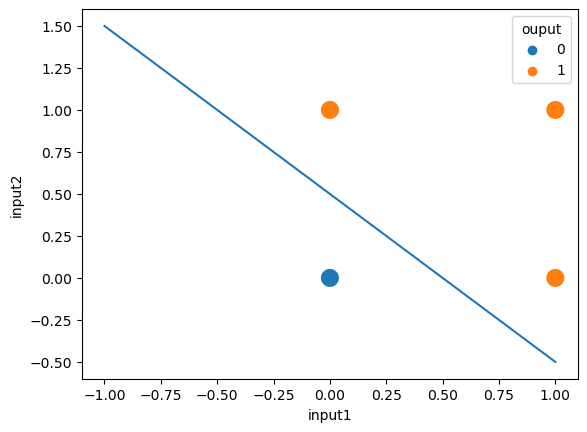

In [70]:
plt.plot(x1,y1)
sns.scatterplot(x=or_data['input1'],y=or_data['input2'],hue=or_data['ouput'],s=200)

[[0. 0.]]
[0.]


<Axes: >

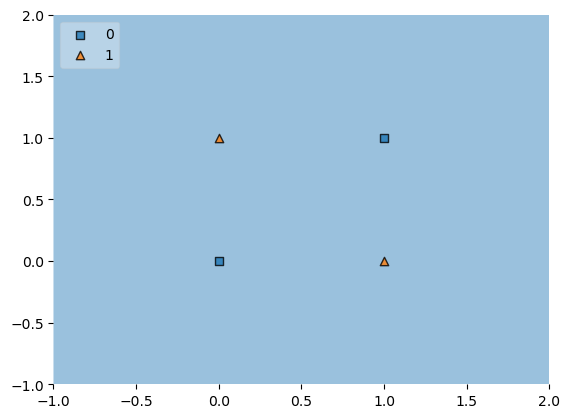

In [71]:
print(clf3.coef_)
print(clf3.intercept_)
plot_decision_regions(xor_data.iloc[:,0:2].values,xor_data.iloc[:,-1].values, clf=clf3, legend=2)